## SI 670 Applied Machine Learning, Week 3: Regularization, Cross Validation, and Logistic Regression

For this assignment, you will be exercising on questions related to Logistic regression, Dummy classifiers, and cross-validation.

* The coding homework is worth 50 points in total. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

* Submit your completed notebook file to the Canvas site - **IMPORTANT**: please name your submitted file `si670f23-hw3-youruniqname.ipynb`

* Any file submitted after the deadline will be marked as late. Please consult the syllabus regarding late submission policies. You can submit the homework as many time as you want, but only your latest submission will be graded.

* As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates. If you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.



In [4]:
import sklearn

### Question 1 (20 points) Bias and Variance


Your task is to investigate the influence of different regularization parameters on the coefficients of a regression model.

Given 10 points around the function $y = x^2 + 2x + 1$. You are asked to train a linear regression with degree 6 polynomial features. And run it with different regularization parameters $\alpha \in \{0,0.1,1,10,100\}$.

Plot the polynomials from your regression results corresponding to each regularization parameter in one figure.


In [13]:
def answer_1():
    import numpy as np
    from sklearn.linear_model import LinearRegression
    import matplotlib.pyplot as plt

    x_list = [-10.38446879, -8.38394902, -5.47700112, -5.04337481, -1.50548227, 3.65324449, 2.32253022, 7.14588818, 7.44347003, 9.67771813]
    y_list = [ 73.21995367, 56.4250573, 24.15989601, 7.14325154, 3.45955269, 6.68448382, 17.93465674, 44.02585723, 79.55124013, 124.46649205]

    # Your code here
    
    poly = sklearn.preprocessing.PolynomialFeatures()
    x_poly = poly.fit_transform(np.array(x_list).reshape(-1, 1))
    
    linreg = LinearRegression().fit(x_poly, y_list)



    # Generate original x values
    x_original = np.linspace(-10, 10)

    # Generate y values based on the function y = x^2 + 2x + 1
    y_original = x_original**2 + 2*x_original + 1

    # Plot the original function and the data
    plt.figure(figsize=(10, 6))
    plt.scatter(x_list, y_list, label='Data Points', color='black')

    # Plot y = x^2 + 2x + 1
    plt.plot(x_original, y_original, label='y = x^2 + 2x + 1', color='red')

    # Plot the polynomials from your regression results here



    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# answer_1()

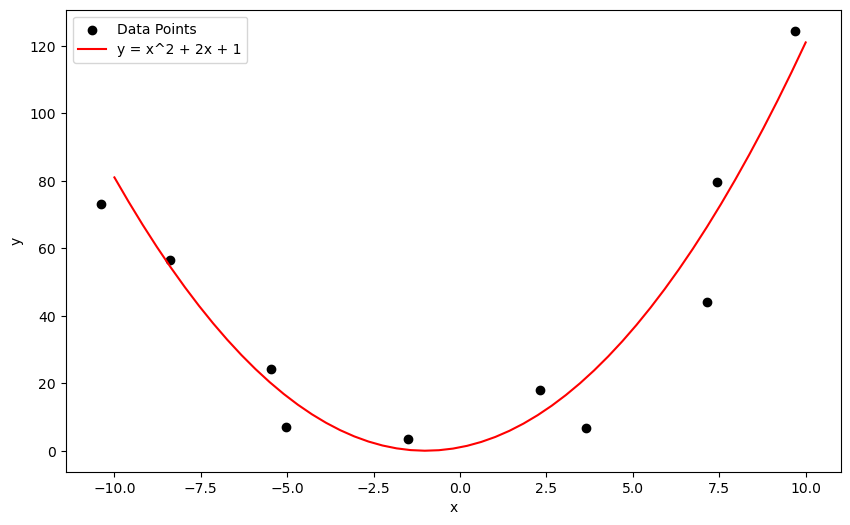

In [14]:
answer_1()

We then give you a data generator that gives 10 data points around the function $y = x^2 + 2x + 1$ each time.

Train a linear regression with degree 6 polynomial features for 1000 times to calculate the bias and variance.

Apply different regularization parameters $\alpha \in \{0,0.1,1,10,100\}$

return a tuple containing two lists:

The first list should contain the bias values at $x^*=0, y^*=1$ corresponding to each regularization parameter. The second list should contain the variance values at $x^*=0, y^*=1$ corresponding to each regularization parameter.

Briefly describe how the bias and variance change when the regularization parameter increases.

In [ ]:
def data_gen():
    # Number of data points
    n = 10

    # Generate original x values: you can choose the range and number of points
    x_original = np.linspace(-10, 10, n)

    # Generate y values based on the function y = x^2 + 2x + 1
    y_original = x_original**2 + 2*x_original + 1

    # Add some noise to x and y values
    noise_strength_x = 1.0  # Control the noise strength for x
    noise_strength_y = 5.0  # Control the noise strength for y

    x_noisy = x_original + noise_strength_x * np.random.randn(n)
    y_noisy = y_original + noise_strength_y * np.random.randn(n)

    return x_noisy, y_noisy


def answer_1_1():
    import numpy as np
    from sklearn.linear_model import LinearRegression

    bias_list = []
    variance_list = []

    # your code here




    return bias_list, variance_list

# answer_1_1()

**Your answer here.**

### Question 2 (15 points) Cross-validation for very small datasets.

We talked about splitting data in training/validation/test.  However, when you have a very small dataset, one issue is that it leads to really tiny validation/test sets, which leads to unreliable test evaluation scores. For example, if you have a dataset with a total of 60 samples, and hold back 25% as a final test set, you'll get a final test set with 15 samples. In this case, a single evaluation score based on merely 15 samples could be very unreliable and probably not something to be relied on heavily.

So to make evaluation more reliable, we discussed how people usually use *cross-validation* to generate *multiple* evaluation scores, each on a different train/test split of the data. That is, you split the train and test set multiple times and then calculate the average of the resulting test scores. This is the approach we'll use to estimate a more reliable final test set score.  We don't want to use these final test sets to also tune our hyperparameters, so we make sure to learn the model and tune the hyperparameters using only the data in the training split.  To do that, we do a second cross-validation *within the training data split* so that we have (i) an outer test set and (ii) a separate in cross-validation that produces several inner *training/validation split's* that's used to pick the best configuration/hyper-parameters.

Use an outer cross validation with $k=5$ folds, and an inner cross-validation with $k'=3$ folds.  Report the average of the final test set scores you got across all $k=5$ folds.  

To simulate a small dataset scenario, we have provided the code that selects the first 60 samples from the built-in diabetes dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). We've also given you the variable 'alpha_list', which has the range of ridge regression hyperparameter alphe you should use for tuning.

Write the code that implements the above scheme on this subset of the boston dataset. You can split the whole dataset into $k=5$ outer folds (step 1) by using the handy `KFold` function (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). In each outer fold, you can then use another `KFold` to split the training data of the outer fold into $k'=3$ inner folds (step 2). In each inner fold, train a Ridge regression model, and use the validation set to evaluate (step 2a). Then you can find the optimal hyper-parameter alpha value within each outer fold (step 2b). Get the final test set score using this optimal model (step 2c). Repeat for all $k=5$ folds to obtain a set of final test scores. (step 3)

Finally, you need to return the mean value of the $k=5$ final test scores. This is your final (more reliable) test set prediction.

In [58]:
def answer_2():
    from sklearn.datasets import load_diabetes
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import KFold

    X,y = load_diabetes(return_X_y=True)
    X=X[:60,:]
    y=y[:60]
    alpha_list = [0.001,0.01,0.1,1,10]

    # Your code here
    kf = KFold(n_splits = 5)
    
    for i, (train_idx, test_idx) in enumerate(kf.split(X)):
        kf_prime = KFold(n_splits = 3)
        
        X_train = X[train_idx]
        y_train = y[train_idx]
        
        X_test = X[test_idx]
        y_test = y[test_idx]

        for j, (train_prime_idx, test_prime_idx) in enumerate(kf_prime.split(X_train)):
            X_train_prime = X_train[train_prime_idx]
            y_train_prime = y_train[train_prime_idx]
            
            X_test_prime = X_train[test_prime_idx]
            y_test_prime = X_train[test_prime_idx]
            
            ridge = Ridge(alpha_list[i]).fit(X_train_prime, y_train_prime)

    return mean_test_score

answer_2()

(32, 10) (48, 10) (16, 10)
(32, 10) (48, 10) (16, 10)
(32, 10) (48, 10) (16, 10)
(32, 10) (48, 10) (16, 10)
(32, 10) (48, 10) (16, 10)
(32, 10) (48, 10) (16, 10)
(32, 10) (48, 10) (16, 10)
(32, 10) (48, 10) (16, 10)
(32, 10) (48, 10) (16, 10)
(32, 10) (48, 10) (16, 10)
(32, 10) (48, 10) (16, 10)
(32, 10) (48, 10) (16, 10)
(32, 10) (48, 10) (16, 10)
(32, 10) (48, 10) (16, 10)
(32, 10) (48, 10) (16, 10)


NameError: name 'mean_test_score' is not defined

### Question 3 (15 points) Regression to the mean

Imagine you are working on a regression problem with three features.

You will:

1. Generate synthetic data.

2. Split data into training, validation, and test sets, with a ratio of 6:2:2

3. Train two different linear regression models (one with Ridge regularization term with $\alpha = 0.2$ and the other without).

4. Evaluate both models on the validation data with Mean Squared Error.

5. Suppose that for each time you will apply the "better" model according to the MSE on the validation data, evaluate it on the test data.

Repeat this 1000 times.  Each time calculate the average of the error of the "better" model on validation data and test data respectively (so you will only record the error of the better model on the validation data, and the error of this same model on the test data.

Which average error is smaller? Why do you expect this (or not expect this)?

In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def answer_3():
    avg_val_error = []
    avg_test_error = []

    for _ in range(1000):

        # Generate synthetic data
        X = 2 * np.random.rand(50, 6)  # 50 samples, 6 features
        y = 10 + np.dot(X, np.array([3, 5, 2, 0, 0, 0])) + 2 * np.random.randn(50)

        # Your code here
        # Split data into training, validation, and test sets, with a ratio of 6:2:2
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
        X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)



        # Train two models
        # Model 1: Linear Regression
        linreg = LinearRegression().fit(X_train, y_train)


        # Model 2: Ridge Regression with alpha = 0.2
        ridge = Ridge(alpha = 0.2).fit(X_train, y_train)


        # Evaluate on validation set
        linreg_predictions = linreg.predict(X_val)
        ridge_predictions = ridge.predict(X_val)
        
        val_mse1 = mean_squared_error(linreg_predictions, y_val)
        val_mse2 = mean_squared_error(ridge_predictions, y_val)

        print(f"Validation MSE for Linear Regression: {val_mse1}")
        print(f"Validation MSE for Ridge Regression: {val_mse2}")

        # Choose the "better" model based on validation MSE
        choice, choice_mse = (linreg, val_mse1) if val_mse1 < val_mse2 else (ridge, val_mse2)


        # Evaluate 'better' model on the test set
        better_predictions = choice.predict(X_test)
        test_mse = mean_squared_error(better_predictions, y_test)

        print(f"Test MSE for the 'better' model: {test_mse}")
        
        avg_test_error.append(test_mse)
        avg_val_error.append(choice_mse)
        
    
    return (stayed_best, worse, np.mean(avg_test_error), np.mean(avg_val_error))


stayed_best, worse, avg_test_error, avg_val_error = answer_3()

Validation MSE for Linear Regression: 1.8150278320326776
Validation MSE for Ridge Regression: 1.7002388274619449
Test MSE for the 'better' model: 11.402150928764078
Validation MSE for Linear Regression: 2.5669129544404807
Validation MSE for Ridge Regression: 2.654117843826642
Test MSE for the 'better' model: 5.41275988796661
Validation MSE for Linear Regression: 2.375323772842808
Validation MSE for Ridge Regression: 2.3938778088966894
Test MSE for the 'better' model: 4.056298363275931
Validation MSE for Linear Regression: 4.499999025824584
Validation MSE for Ridge Regression: 4.2292012696238475
Test MSE for the 'better' model: 8.758329817346667
Validation MSE for Linear Regression: 8.26908736293239
Validation MSE for Ridge Regression: 8.31521868331643
Test MSE for the 'better' model: 5.9853094684107155
Validation MSE for Linear Regression: 1.0639225970039505
Validation MSE for Ridge Regression: 1.177706368933724
Test MSE for the 'better' model: 5.74009608575862
Validation MSE for Linea

Validation MSE for Linear Regression: 5.331451827545115
Validation MSE for Ridge Regression: 5.146221921428614
Test MSE for the 'better' model: 4.080383894708302
Validation MSE for Linear Regression: 6.160350738210949
Validation MSE for Ridge Regression: 6.299709118399933
Test MSE for the 'better' model: 5.849702233043538
Validation MSE for Linear Regression: 1.5451300684585711
Validation MSE for Ridge Regression: 1.422026564658265
Test MSE for the 'better' model: 11.629936945338589
Validation MSE for Linear Regression: 6.338052996809388
Validation MSE for Ridge Regression: 6.615788095329864
Test MSE for the 'better' model: 9.133787830580623
Validation MSE for Linear Regression: 4.038417928752956
Validation MSE for Ridge Regression: 4.112408823207911
Test MSE for the 'better' model: 3.2232058768315426
Validation MSE for Linear Regression: 1.9990531712581092
Validation MSE for Ridge Regression: 1.9858980317496546
Test MSE for the 'better' model: 6.436886635896792
Validation MSE for Line

Validation MSE for Linear Regression: 2.601945363217476
Validation MSE for Ridge Regression: 2.5822037287328174
Test MSE for the 'better' model: 2.013240787368452
Validation MSE for Linear Regression: 10.75869854112624
Validation MSE for Ridge Regression: 10.1308392451315
Test MSE for the 'better' model: 6.750743532558738
Validation MSE for Linear Regression: 6.938116744382135
Validation MSE for Ridge Regression: 6.923773440780664
Test MSE for the 'better' model: 4.167627482371908
Validation MSE for Linear Regression: 2.179884262240219
Validation MSE for Ridge Regression: 2.2863641550000495
Test MSE for the 'better' model: 2.6874890972796073
Validation MSE for Linear Regression: 3.76746731603997
Validation MSE for Ridge Regression: 3.7022389280616843
Test MSE for the 'better' model: 1.5114397203255598
Validation MSE for Linear Regression: 1.6474421795174194
Validation MSE for Ridge Regression: 1.6822137010642852
Test MSE for the 'better' model: 3.767934514312018
Validation MSE for Line

Validation MSE for Linear Regression: 2.75030182813581
Validation MSE for Ridge Regression: 2.865286597134362
Test MSE for the 'better' model: 3.9926798385637263
Validation MSE for Linear Regression: 4.8497271057420654
Validation MSE for Ridge Regression: 5.046257077444677
Test MSE for the 'better' model: 4.147153358603511
Validation MSE for Linear Regression: 4.501726460425802
Validation MSE for Ridge Regression: 4.507034018275039
Test MSE for the 'better' model: 3.9937054959030505
Validation MSE for Linear Regression: 1.1954881622906117
Validation MSE for Ridge Regression: 1.2071897949936916
Test MSE for the 'better' model: 6.066971383730414
Validation MSE for Linear Regression: 8.071240047232333
Validation MSE for Ridge Regression: 8.300027774739071
Test MSE for the 'better' model: 4.67046513101479
Validation MSE for Linear Regression: 3.245377121952937
Validation MSE for Ridge Regression: 3.266805357695142
Test MSE for the 'better' model: 8.747800523983184
Validation MSE for Linear

Validation MSE for Linear Regression: 6.601256091117297
Validation MSE for Ridge Regression: 6.544395200422254
Test MSE for the 'better' model: 8.907504685524648
Validation MSE for Linear Regression: 2.0544857891536776
Validation MSE for Ridge Regression: 2.0344318995042507
Test MSE for the 'better' model: 3.5460377903412734
Validation MSE for Linear Regression: 7.61445245818499
Validation MSE for Ridge Regression: 7.57971391535621
Test MSE for the 'better' model: 4.025283129692611
Validation MSE for Linear Regression: 6.367386490802369
Validation MSE for Ridge Regression: 6.210006272057774
Test MSE for the 'better' model: 9.063430719894896
Validation MSE for Linear Regression: 8.664564657311114
Validation MSE for Ridge Regression: 8.885209042468107
Test MSE for the 'better' model: 4.234737637565326
Validation MSE for Linear Regression: 1.5428855249876179
Validation MSE for Ridge Regression: 1.393277049433955
Test MSE for the 'better' model: 2.1428695400177062
Validation MSE for Linear

Validation MSE for Linear Regression: 2.004549400984732
Validation MSE for Ridge Regression: 2.1126548808429098
Test MSE for the 'better' model: 2.666515209433537
Validation MSE for Linear Regression: 5.174098658796811
Validation MSE for Ridge Regression: 4.69332231169757
Test MSE for the 'better' model: 3.573883153171777
Validation MSE for Linear Regression: 4.984985214908074
Validation MSE for Ridge Regression: 5.058906358165011
Test MSE for the 'better' model: 5.158145649813796
Validation MSE for Linear Regression: 3.325862745421734
Validation MSE for Ridge Regression: 3.333102832131911
Test MSE for the 'better' model: 6.485562120894384
Validation MSE for Linear Regression: 6.706834719113767
Validation MSE for Ridge Regression: 6.58495948390465
Test MSE for the 'better' model: 5.194212980380531
Validation MSE for Linear Regression: 3.8851533939690293
Validation MSE for Ridge Regression: 3.825641377670299
Test MSE for the 'better' model: 1.917582499887026
Validation MSE for Linear Re

Validation MSE for Linear Regression: 2.5763042439776145
Validation MSE for Ridge Regression: 2.6301574919126316
Test MSE for the 'better' model: 5.667630253125291
Validation MSE for Linear Regression: 7.203341958297024
Validation MSE for Ridge Regression: 6.501633612307849
Test MSE for the 'better' model: 4.261993431659555
Validation MSE for Linear Regression: 3.092221985287312
Validation MSE for Ridge Regression: 3.1290489270419735
Test MSE for the 'better' model: 2.471870952202765
Validation MSE for Linear Regression: 6.691535115184723
Validation MSE for Ridge Regression: 6.429555225594891
Test MSE for the 'better' model: 6.53432005658708
Validation MSE for Linear Regression: 3.519560024338387
Validation MSE for Ridge Regression: 3.535514142120225
Test MSE for the 'better' model: 7.289861207875562
Validation MSE for Linear Regression: 1.8758454679125447
Validation MSE for Ridge Regression: 1.751498562735281
Test MSE for the 'better' model: 4.5007318158189635
Validation MSE for Linea

Validation MSE for Linear Regression: 4.467285134177489
Validation MSE for Ridge Regression: 4.691468711961464
Test MSE for the 'better' model: 6.440500438051839
Validation MSE for Linear Regression: 5.347176727736832
Validation MSE for Ridge Regression: 5.307484610373168
Test MSE for the 'better' model: 3.9837316183841507
Validation MSE for Linear Regression: 11.349675060808671
Validation MSE for Ridge Regression: 11.538874083936529
Test MSE for the 'better' model: 3.9632112599508296
Validation MSE for Linear Regression: 5.394168623481579
Validation MSE for Ridge Regression: 5.350249247352675
Test MSE for the 'better' model: 2.7413950414699864
Validation MSE for Linear Regression: 5.823877380904571
Validation MSE for Ridge Regression: 5.69581744625677
Test MSE for the 'better' model: 23.12928782793177
Validation MSE for Linear Regression: 10.368831688956373
Validation MSE for Ridge Regression: 10.425789379526083
Test MSE for the 'better' model: 7.641891984210181
Validation MSE for Lin

Validation MSE for Linear Regression: 2.599272118655223
Validation MSE for Ridge Regression: 2.782479663873864
Test MSE for the 'better' model: 2.952712474130196
Validation MSE for Linear Regression: 8.674235033150923
Validation MSE for Ridge Regression: 8.24012895229846
Test MSE for the 'better' model: 8.995555298368258
Validation MSE for Linear Regression: 8.646026547599439
Validation MSE for Ridge Regression: 8.562046376576312
Test MSE for the 'better' model: 4.80340079126942
Validation MSE for Linear Regression: 4.676175078937481
Validation MSE for Ridge Regression: 4.561554840714929
Test MSE for the 'better' model: 2.7618366569527852
Validation MSE for Linear Regression: 4.36082879632503
Validation MSE for Ridge Regression: 4.399486208371322
Test MSE for the 'better' model: 2.998660059986503
Validation MSE for Linear Regression: 4.908617707638645
Validation MSE for Ridge Regression: 5.059332542817012
Test MSE for the 'better' model: 6.7878419101113625
Validation MSE for Linear Reg

Validation MSE for Linear Regression: 6.373932892517054
Validation MSE for Ridge Regression: 6.545682970729554
Test MSE for the 'better' model: 3.784715289562537
Validation MSE for Linear Regression: 6.1462409157239515
Validation MSE for Ridge Regression: 5.681710294025388
Test MSE for the 'better' model: 9.23702415058995
Validation MSE for Linear Regression: 4.02400320472012
Validation MSE for Ridge Regression: 4.091667682510986
Test MSE for the 'better' model: 6.856493585844076
Validation MSE for Linear Regression: 5.5657669670404655
Validation MSE for Ridge Regression: 5.519766553219798
Test MSE for the 'better' model: 5.910113158954834
Validation MSE for Linear Regression: 9.703189816580466
Validation MSE for Ridge Regression: 9.357829964459446
Test MSE for the 'better' model: 4.019761306827985
Validation MSE for Linear Regression: 7.041406146702566
Validation MSE for Ridge Regression: 7.034120598433693
Test MSE for the 'better' model: 4.263327787005805
Validation MSE for Linear Re

Validation MSE for Linear Regression: 3.074007897823699
Validation MSE for Ridge Regression: 2.997384382022227
Test MSE for the 'better' model: 5.419509790825747
Validation MSE for Linear Regression: 2.240065046314245
Validation MSE for Ridge Regression: 2.202546427184918
Test MSE for the 'better' model: 3.1990406726806215
Validation MSE for Linear Regression: 4.328808569941996
Validation MSE for Ridge Regression: 4.2827628375764615
Test MSE for the 'better' model: 5.152523694620273
Validation MSE for Linear Regression: 2.9226589134299275
Validation MSE for Ridge Regression: 2.934314607013768
Test MSE for the 'better' model: 4.3783565432294145
Validation MSE for Linear Regression: 3.2116617539325034
Validation MSE for Ridge Regression: 3.264756850513843
Test MSE for the 'better' model: 7.469329922473841
Validation MSE for Linear Regression: 7.917470646381219
Validation MSE for Ridge Regression: 7.562160082480446
Test MSE for the 'better' model: 5.325044729051545
Validation MSE for Line

Validation MSE for Linear Regression: 9.79062439504736
Validation MSE for Ridge Regression: 9.868478797133577
Test MSE for the 'better' model: 3.4229720520054627
Validation MSE for Linear Regression: 3.170633798132252
Validation MSE for Ridge Regression: 3.278093731730653
Test MSE for the 'better' model: 2.897678932811189
Validation MSE for Linear Regression: 7.683700262959948
Validation MSE for Ridge Regression: 8.121535354974371
Test MSE for the 'better' model: 12.819379800857558
Validation MSE for Linear Regression: 4.935805077421699
Validation MSE for Ridge Regression: 4.753648975892628
Test MSE for the 'better' model: 2.9174972273833255
Validation MSE for Linear Regression: 5.0363284548855995
Validation MSE for Ridge Regression: 4.875433074623317
Test MSE for the 'better' model: 3.6741511408153733
Validation MSE for Linear Regression: 1.9938210413943895
Validation MSE for Ridge Regression: 1.9630636084042823
Test MSE for the 'better' model: 4.452228573917513
Validation MSE for Lin

Validation MSE for Linear Regression: 3.475564942775334
Validation MSE for Ridge Regression: 3.447656265045631
Test MSE for the 'better' model: 4.510346727311604
Validation MSE for Linear Regression: 2.253147687998316
Validation MSE for Ridge Regression: 2.167679470684649
Test MSE for the 'better' model: 1.7160718606606313
Validation MSE for Linear Regression: 4.172023947116852
Validation MSE for Ridge Regression: 4.110199421806622
Test MSE for the 'better' model: 4.337113388821499
Validation MSE for Linear Regression: 6.400821148307505
Validation MSE for Ridge Regression: 6.493979840887508
Test MSE for the 'better' model: 5.567257858164391
Validation MSE for Linear Regression: 8.02257213955269
Validation MSE for Ridge Regression: 7.697414667063031
Test MSE for the 'better' model: 4.3111314742856495
Validation MSE for Linear Regression: 4.483799872440122
Validation MSE for Ridge Regression: 4.53632487964029
Test MSE for the 'better' model: 10.600227418235882
Validation MSE for Linear R

Validation MSE for Linear Regression: 5.600819578543879
Validation MSE for Ridge Regression: 5.143780002702057
Test MSE for the 'better' model: 12.75721873304709
Validation MSE for Linear Regression: 3.091852566221969
Validation MSE for Ridge Regression: 3.0975615360715723
Test MSE for the 'better' model: 2.4205633689703143
Validation MSE for Linear Regression: 3.2582874485493134
Validation MSE for Ridge Regression: 3.2366666733145513
Test MSE for the 'better' model: 3.884630393667531
Validation MSE for Linear Regression: 3.86644703294769
Validation MSE for Ridge Regression: 4.1078223130196045
Test MSE for the 'better' model: 4.130537405610063
Validation MSE for Linear Regression: 4.5361711188058935
Validation MSE for Ridge Regression: 4.518957748034288
Test MSE for the 'better' model: 5.011186815549356
Validation MSE for Linear Regression: 5.61325970689011
Validation MSE for Ridge Regression: 5.71578574227097
Test MSE for the 'better' model: 7.918856547291152
Validation MSE for Linear

In [43]:
avg_test_error, avg_val_error

(5.141027314025057, 4.993374661925525)

The average test error is larger than the average validation error. This is likely because of regression to the mean. Whennever we're comparing two classifiers performance, we generally expect the better performing classifier to do worse in subsequent evaluations. In fact, the estimate of the best predictor will likely be upwardly biased.

Whenever, we train a classifier, there is some degree of signal and noise in our estimate. Often, noise can cause a classifier to overperform and lead us to think it has a higher accuracy than it actually does. But when noise is removed, top-performing classifiers tend to regress toowards the mean. In other words, we may get lucky and achieve very high accuracy with a classifier sometimes, but we know we won't always be lucky — with subsequent evaluations, our average performance will converge back to the expected value. 